In [16]:


# import necessary libraries 
# Global 

from _ms_pod_global_functions import wav_play , wav_plot_3 #wav_play(audio_path) , wav_plot_3(file_path)

# STEP 2 : AUDIO EDITING - Quality 1a### DUAL MONO - 
### COMPRESSION


Both steps are crucial for professional audio processing, especially for podcasts and broadcast content. Compression ensures consistent audibility within the track, and LUFS normalization ensures that the overall loudness meets the standards of the intended platform, providing a uniform listening experience. This combination is key to achieving high-quality, platform-compliant audio content.

Adjust the Compression Threshold: Lowering the compression threshold means that more parts of the audio will be subjected to compression

In [33]:
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import lfilter

def simple_compressor(audio, sr, threshold=-20.0, ratio=4.0, attack=0.01, release=0.1):
    """
    Apply simple compression to an audio signal.

    :param audio: NumPy array of audio samples
    :param sr: Sample rate of the audio
    :param threshold: Threshold for compression (dB)
    :param ratio: Compression ratio
    :param attack: Attack time in seconds
    :param release: Release time in seconds
    :return: Compressed audio
    """
    # Convert threshold from dB to amplitude
    threshold_amplitude = 10**(threshold / 20)

    # Prepare attack and release coefficients
    attack_coeff = np.exp(-1/(sr * attack))
    release_coeff = np.exp(-1/(sr * release))

    # Envelope detection and compression
    envelope = 0
    compressed_audio = np.zeros_like(audio)
    for i, sample in enumerate(audio):
        envelope = max(abs(sample), envelope * attack_coeff if abs(sample) < envelope else envelope * release_coeff)
        gain = 1 if envelope < threshold_amplitude else threshold_amplitude / envelope ** (1 - 1 / ratio)
        compressed_audio[i] = sample * gain

    return compressed_audio

def compress_and_normalize_lufs(input_file_path, output_file_path, threshold=-20.0, ratio=4.0, attack=0.01, release=0.1, target_lufs=-23.0):
    """
    Applies simple compression and adjusts gain to normalize to a target LUFS.

    :param input_file_path: path to the input audio file
    :param output_file_path: path to save the output audio file
    :param threshold: dB threshold for compression
    :param ratio: compression ratio
    :param attack: attack time in seconds
    :param release: release time in seconds
    :param target_lufs: target LUFS level for normalization
    :return: None
    """
    
    # Load the audio file
    audio, sr = librosa.load(input_file_path, sr=None)

    # Apply basic compression
    audio_compressed = simple_compressor(audio, sr, threshold=threshold, ratio=ratio, attack=attack, release=release)

    # Calculate the required gain to achieve the target LUFS (simplified approach)
    # Note: This is a basic estimation and might not be accurate
    current_loudness = 20 * np.log10(np.mean(np.abs(audio_compressed)))
    gain = target_lufs - current_loudness

    # Apply the gain
    audio_normalized = audio_compressed * 10**(gain / 20)

    # Save the processed audio
    sf.write(output_file_path, audio_normalized, sr)

# Usage
input_file =  "_pod_1_recording/vr_50_cut_off_HP_NR_Gated_padded.wav"
output_file = "_pod_1_recording/vr_50_cut_off_HP_NR_Compressed.wav"

compress_and_normalize_lufs(input_file, output_file, threshold=-14.0, ratio=2.0, attack=0.01, release=0.5, target_lufs=-21.0)


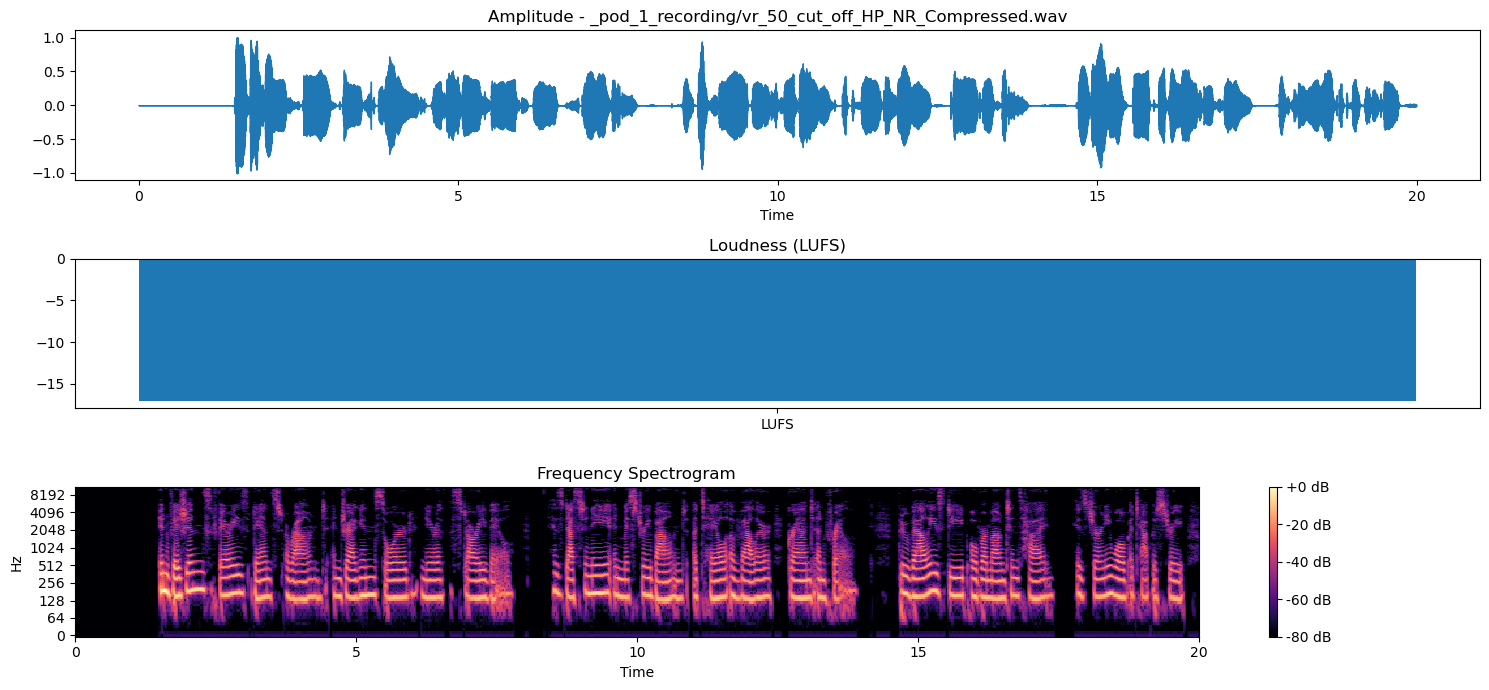

In [34]:

#Example usage
wav_plot_3(output_file)


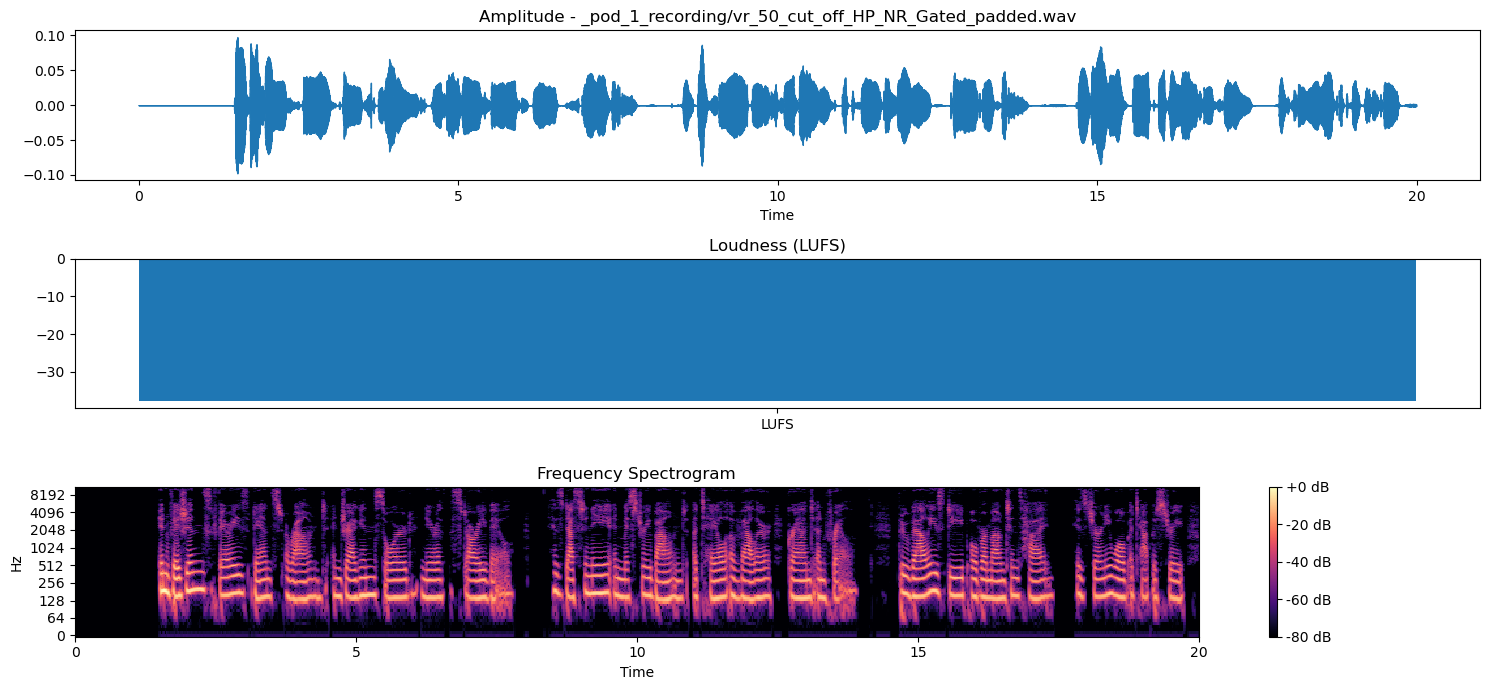

In [35]:
wav_plot_3(input_file)

# 22

import os
print(os.getcwd())


In [19]:
import os
print(os.getcwd())


/Users/yerik/_apple_source/PY/JUPY/py2ms/ms_2_PODCASTS_CAI
